In [132]:
from PIL import Image
from urllib.request import urlopen
from io import BytesIO
import matplotlib.pyplot as plt

## Loading

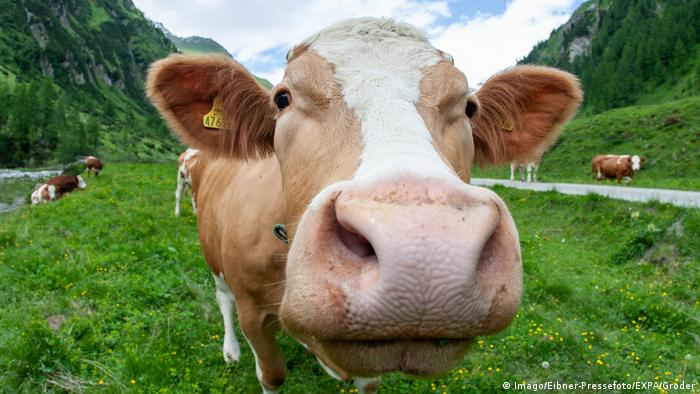

In [134]:
def load_example():
    img_url = 'https://static.dw.com/image/47863948_303.jpg'
    return Image.open(urlopen(img_url))

im = load_example()
im

In [135]:
print(im.format, im.size, im.mode)

JPEG (700, 394) RGB


## Scaling

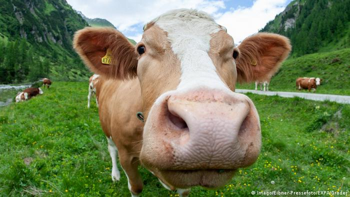

In [67]:
size = (350, 197)
im.thumbnail(size)
im

## Cropping

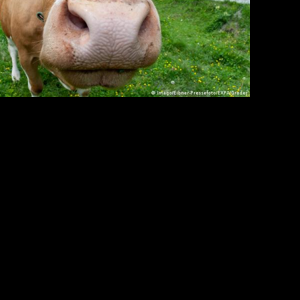

In [29]:
box = (100, 100, 400, 400)
region = im.crop(box)
region

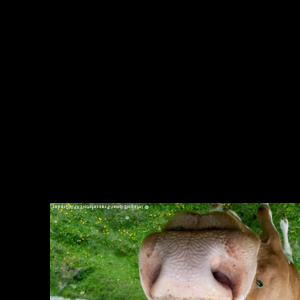

In [39]:
region = region.transpose(Image.Transpose.ROTATE_180)
region

## Rolling

In [73]:
def roll(img, delta):
    """Roll an image sideways."""
    xsize, ysize = im.size
    new_im = Image.new("RGBA", (xsize, ysize))
    new_im.paste(im)

    delta = delta % xsize
    if delta == 0:
        return im

    part1 = new_im.crop((0, 0, delta, ysize))
    part2 = new_im.crop((delta, 0, xsize, ysize))
    new_im.paste(part1, (xsize - delta, 0, xsize, ysize))
    new_im.paste(part2, (0, 0, xsize - delta, ysize))

    return new_im

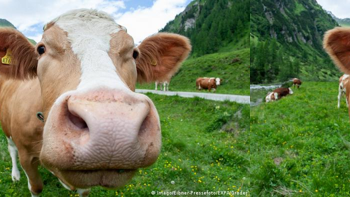

In [76]:
roll(im, 100)

## Merging

In [77]:
def merge(im1, im2):
    w = im1.size[0] + im2.size[0]
    h = max(im1.size[1], im2.size[1])
    im = Image.new("RGBA", (w, h))

    im.paste(im1)
    im.paste(im2, (im1.size[0], 0))

    return im

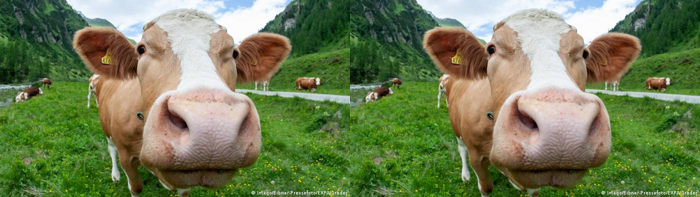

In [78]:
merge(im, im)

## Splitting colors

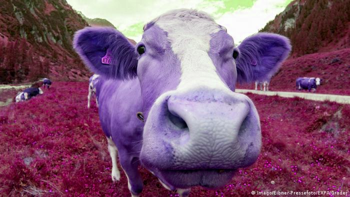

In [84]:
r, g, b = im.split()
new_im = Image.merge("RGB", (g, b, r))
new_im

## Simple geometry transforms

In [138]:
out = im.resize((700, 394))
out = out.rotate(45) # degrees counter-clockwise
out

AttributeError: 'NoneType' object has no attribute 'seek'

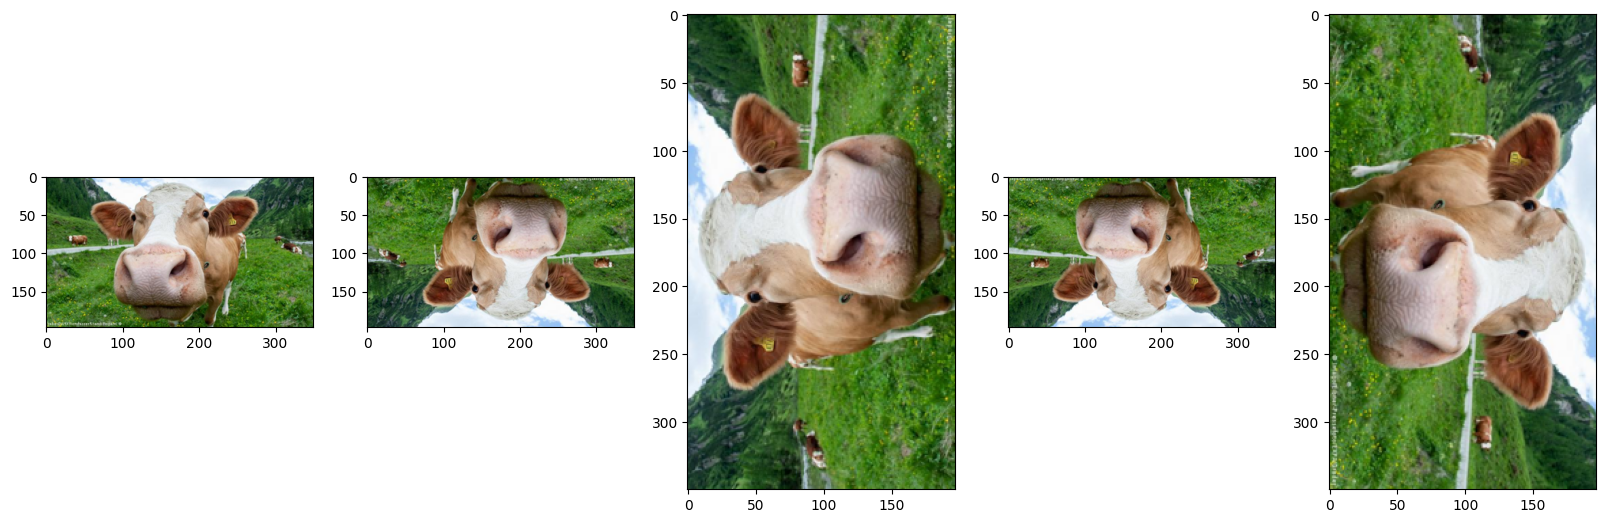

In [100]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate([
    im.transpose(Image.Transpose.FLIP_LEFT_RIGHT),
    im.transpose(Image.Transpose.FLIP_TOP_BOTTOM),
    im.transpose(Image.Transpose.ROTATE_90),
    im.transpose(Image.Transpose.ROTATE_180),
    im.transpose(Image.Transpose.ROTATE_270)
]):
    plt.subplot(1, columns, i + 1)
    plt.imshow(image)

## Color transform

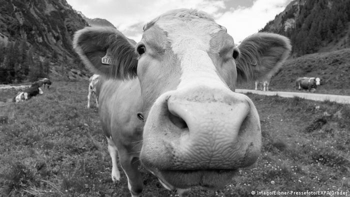

In [102]:
im.convert("L")

## Filters

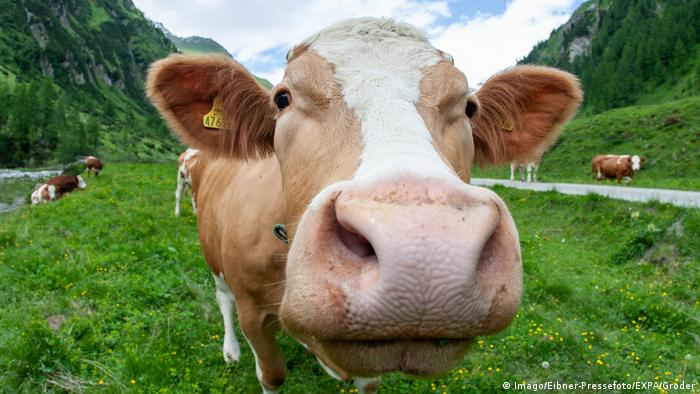

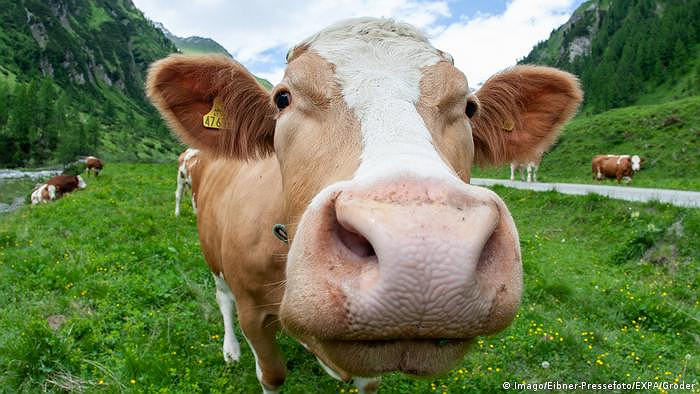

In [110]:
from PIL import ImageFilter

im = load_example()
display(im)
im.filter(ImageFilter.DETAIL)

## Applying point transforms

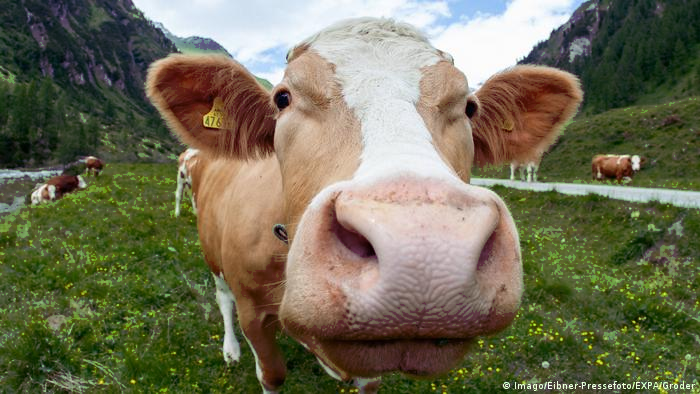

In [112]:
# split the image into individual bands
source = im.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
out = Image.merge(im.mode, source)

out

## Image sequences

In [118]:
gif = Image.open(BytesIO(requests.get(
    'https://c.tenor.com/nfz3jihdSG8AAAAC/overcome-your-dog-just-died.gif'
).content))

### Reading sequences


In [119]:
from PIL import Image

with gif as im:
    im.seek(1)  # skip to the second frame

    try:
        while 1:
            im.seek(im.tell() + 1)
            # do something to im
    except EOFError:
        pass  # end of sequence

### Using the ImageSequence Iterator class

In [120]:
from PIL import ImageSequence
for frame in ImageSequence.Iterator(gif):
    pass  # ...do something to frame...

## Filters continuation

In [147]:
n_rows

1

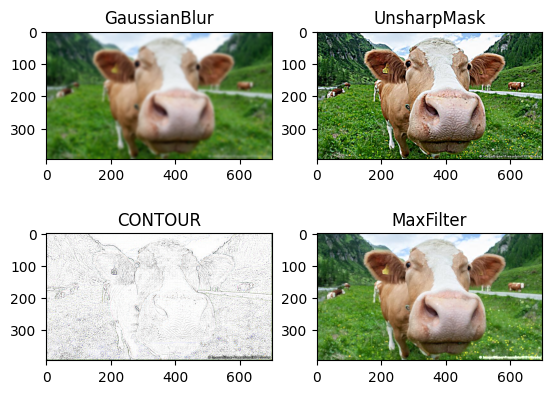

In [173]:
import math

im = load_example()

filtered_imgs = {
    "GaussianBlur": im.filter(ImageFilter.GaussianBlur(3)),
    "UnsharpMask": im.filter(ImageFilter.UnsharpMask(3, 150, 3)),
    "CONTOUR": im.filter(ImageFilter.CONTOUR),
    "MaxFilter": im.filter(ImageFilter.MaxFilter)
}

n_cols = 2
n_rows = math.ceil(len(filtered_imgs)/n_cols)

_, axs = plt.subplots(n_rows, n_cols)  # , figsize=(20, 10*(n_rows) + 1))

for i, (filter_name, image) in enumerate(filtered_imgs.items()):
    if n_rows == 1:
        axs[i].imshow(image)
        axs[i].set_title(filter_name)
    else:
        axs[int(i/n_rows), i%n_cols].imshow(image)
        axs[int(i/n_rows), i%n_cols].set_title(filter_name)

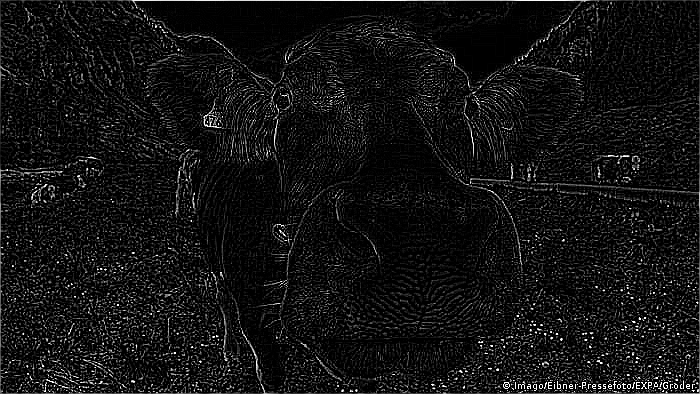

In [175]:
new_img = im.convert("L")
new_img = new_img.filter(ImageFilter.FIND_EDGES)
new_img